In [4667]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly.express as px
import seaborn as sn

In [4668]:
imp_exp = pd.read_excel('export and import.xlsx', sheet_name = ["IMPORT 2014", "EXPORT 2014", "IMPORT 2015", "EXPORT 2015", "IMPORT 2016","EXPORT 2016", "IMPORT 2017", "EXPORT 2017", "IMPORT 2018", "EXPORT 2018"])

In [4669]:
imp_exp

{'IMPORT 2014':     TRADE IMPORT FOR 2014                                         Unnamed: 1  \
 0                 HS CODE                                   ITEM DESCRIPTION   
 1              2523100000                                    Cement clinkers   
 2              8705900010      Other special purpose motor vehicle, nes, new   
 3              2709000000     Petroleum oils and oils obtained from bitum...   
 4              8502399000               Other generating sets : Other: Other   
 ..                    ...                                                ...   
 96             3904100000     Polyvinyl chloride, not mixed with other su...   
 97             8409990000     Parts for compression-ignition internal com...   
 98             8703332050     Other vehicles, with compression-ignition i...   
 99             7214200000     Iron/Steel b&r, h/r, irregular coils with d...   
 100            8703331910     Other vehicles, with compression-ignition i...   
 
           

In [4670]:
import copy
shallow_copied_df = copy.copy(imp_exp)

In [4671]:
imp2014 = imp_exp.get("IMPORT 2014")

In [4672]:
imp2014

,TRADE IMPORT FOR 2014,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,HS CODE,ITEM DESCRIPTION,CUSTOM VALUE (GHS),NETWEIGHT (KGs)
1,2523100000,Cement clinkers,"1,646,138,259","3,866,159,818"
2,8705900010,"Other special purpose motor vehicle, nes, new","1,199,512,148","737,439"
3,2709000000,Petroleum oils and oils obtained from bitum...,"1,149,418,088","3,857,277"
4,8502399000,Other generating sets : Other: Other,"907,226,468","13,009,081"
...,...,...,...,...
96,3904100000,"Polyvinyl chloride, not mixed with other su...","71,003,613","22,152,806"
97,8409990000,Parts for compression-ignition internal com...,"70,386,492","1,147,440"
98,8703332050,"Other vehicles, with compression-ignition i...","70,364,764","2,528,818"
99,7214200000,"Iron/Steel b&r, h/r, irregular coils with d...","70,099,152","39,949,980"


In [4673]:
imp2014 = imp2014.drop([0])

In [4674]:
imp2014

,TRADE IMPORT FOR 2014,Unnamed: 1,Unnamed: 2,Unnamed: 3
1,2523100000,Cement clinkers,"1,646,138,259","3,866,159,818"
2,8705900010,"Other special purpose motor vehicle, nes, new","1,199,512,148","737,439"
3,2709000000,Petroleum oils and oils obtained from bitum...,"1,149,418,088","3,857,277"
4,8502399000,Other generating sets : Other: Other,"907,226,468","13,009,081"
5,8708990000,"Parts and accessories, nes, for vehicles of...","721,513,002","3,282,918"
...,...,...,...,...
96,3904100000,"Polyvinyl chloride, not mixed with other su...","71,003,613","22,152,806"
97,8409990000,Parts for compression-ignition internal com...,"70,386,492","1,147,440"
98,8703332050,"Other vehicles, with compression-ignition i...","70,364,764","2,528,818"
99,7214200000,"Iron/Steel b&r, h/r, irregular coils with d...","70,099,152","39,949,980"


In [4675]:
imp2014.duplicated().sum()

0

In [4676]:
imp2014.isna().sum()

TRADE IMPORT FOR 2014    0
Unnamed: 1               0
Unnamed: 2               0
Unnamed: 3               0
dtype: int64

In [4677]:
imp2014 = imp2014.rename(columns = {'TRADE IMPORT FOR 2014' : 'hs_code'})

In [4678]:
imp2014 = imp2014.rename(columns = {'Unnamed: 1' : 'items'})

In [4679]:
imp2014 = imp2014.rename(columns = {'Unnamed: 2' : 'custom_value_ghs'})

In [4680]:
imp2014 = imp2014.rename(columns = {'Unnamed: 3' : 'netweight_kgs'})

In [4681]:
imp2014['hs_code'] = imp2014['hs_code'].str.strip()

In [4682]:
imp2014['hs_chapter_code'] = imp2014['hs_code'].astype(str).str[:2]

In [4683]:
imp2014['hs_chapter_code'] = imp2014['hs_chapter_code'].astype(int)

In [4684]:
imp2014['items'] = imp2014['items'].str.strip()

In [4685]:
imp2014['imp_exp'] = 'imports'

In [4686]:
imp2014

,hs_code,items,custom_value_ghs,netweight_kgs,hs_chapter_code,imp_exp
1,2523100000,Cement clinkers,"1,646,138,259","3,866,159,818",25,imports
2,8705900010,"Other special purpose motor vehicle, nes, new","1,199,512,148","737,439",87,imports
3,2709000000,Petroleum oils and oils obtained from bitumino...,"1,149,418,088","3,857,277",27,imports
4,8502399000,Other generating sets : Other: Other,"907,226,468","13,009,081",85,imports
5,8708990000,"Parts and accessories, nes, for vehicles of 87...","721,513,002","3,282,918",87,imports
...,...,...,...,...,...,...
96,3904100000,"Polyvinyl chloride, not mixed with other subst...","71,003,613","22,152,806",39,imports
97,8409990000,Parts for compression-ignition internal combus...,"70,386,492","1,147,440",84,imports
98,8703332050,"Other vehicles, with compression-ignition inte...","70,364,764","2,528,818",87,imports
99,7214200000,"Iron/Steel b&r, h/r, irregular coils with defo...","70,099,152","39,949,980",72,imports


In [4687]:
imp2014['custom_value_ghs'] = imp2014['custom_value_ghs'].astype(float)
imp2014['custom_value_usd'] = imp2014['custom_value_ghs'] / 3.2

In [4688]:
imp2014

,hs_code,items,custom_value_ghs,netweight_kgs,hs_chapter_code,imp_exp,custom_value_usd
1,2523100000,Cement clinkers,"1,646,138,259","3,866,159,818",25,imports,"514,418,206"
2,8705900010,"Other special purpose motor vehicle, nes, new","1,199,512,148","737,439",87,imports,"374,847,546"
3,2709000000,Petroleum oils and oils obtained from bitumino...,"1,149,418,088","3,857,277",27,imports,"359,193,153"
4,8502399000,Other generating sets : Other: Other,"907,226,468","13,009,081",85,imports,"283,508,271"
5,8708990000,"Parts and accessories, nes, for vehicles of 87...","721,513,002","3,282,918",87,imports,"225,472,813"
...,...,...,...,...,...,...,...
96,3904100000,"Polyvinyl chloride, not mixed with other subst...","71,003,613","22,152,806",39,imports,"22,188,629"
97,8409990000,Parts for compression-ignition internal combus...,"70,386,492","1,147,440",84,imports,"21,995,779"
98,8703332050,"Other vehicles, with compression-ignition inte...","70,364,764","2,528,818",87,imports,"21,988,989"
99,7214200000,"Iron/Steel b&r, h/r, irregular coils with defo...","70,099,152","39,949,980",72,imports,"21,905,985"


In [4689]:
exp2014 = imp_exp.get("EXPORT 2014")

In [4690]:
exp2014

,TRADE EXPORT FOR 2014,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,HS CODE,ITEM DESCRIPTION,CUSTOM VALUE (GHS),NETWEIGHT (KGs)
1,2709000000,Petroleum oils and oils obtained from bitum...,"12,807,117,405","5,083,270,948"
2,7108131000,Gold bullion,"12,416,766,877","216,346"
3,1801001100,"Cocoa beans, superior quality raw beans","5,787,352,852",784958252
4,7108120000,Unwrought gold (incl. gold plated with plat...,"416,894,040","3,739"
...,...,...,...,...
96,1106209900,"Other, not Cocoyam flour","11,270,003","67,067"
97,7001000000,Cullet and other waste and scrap of glass; ...,"11,163,788","12,086,061"
98,3602009000,Other prepared explosives,"11,078,514",530466
99,3917231000,Of polymers of vinyl chloride for water supply,"10,929,241","2,150,357"


In [4691]:
exp2014.duplicated().sum()

0

In [4692]:
exp2014.isna().sum()

TRADE EXPORT FOR 2014    0
Unnamed: 1               0
Unnamed: 2               0
Unnamed: 3               0
dtype: int64

In [4693]:
exp2014 = exp2014.drop([0])

In [4694]:
exp2014 = exp2014.rename(columns = {'TRADE EXPORT FOR 2014' : 'hs_code'})

In [4695]:
exp2014 = exp2014.rename(columns = {'Unnamed: 1' : 'items'})

In [4696]:
exp2014 = exp2014.rename(columns = {'Unnamed: 2' : 'custom_value_ghs'})

In [4697]:
exp2014 = exp2014.rename(columns = {'Unnamed: 3' : 'netweight_kgs'})

In [4698]:
exp2014['hs_code'] = exp2014['hs_code'].str.strip()

In [4699]:
exp2014['hs_chapter_code'] = exp2014['hs_code'].astype(str).str[:2]

In [4700]:
exp2014['hs_chapter_code'] = exp2014['hs_chapter_code'].astype(int)

In [4701]:
exp2014['items'] = exp2014['items'].str.strip()

In [4702]:
exp2014['imp_exp'] = 'exports'

In [4703]:
exp2014

,hs_code,items,custom_value_ghs,netweight_kgs,hs_chapter_code,imp_exp
1,2709000000,Petroleum oils and oils obtained from bitumino...,"12,807,117,405","5,083,270,948",27,exports
2,7108131000,Gold bullion,"12,416,766,877","216,346",71,exports
3,1801001100,"Cocoa beans, superior quality raw beans","5,787,352,852",784958252,18,exports
4,7108120000,Unwrought gold (incl. gold plated with platinu...,"416,894,040","3,739",71,exports
5,1513290000,Palm kernel or babassu oil (excl. crude) and f...,"386,065,926","7,285,423",15,exports
...,...,...,...,...,...,...
96,1106209900,"Other, not Cocoyam flour","11,270,003","67,067",11,exports
97,7001000000,Cullet and other waste and scrap of glass; gla...,"11,163,788","12,086,061",70,exports
98,3602009000,Other prepared explosives,"11,078,514",530466,36,exports
99,3917231000,Of polymers of vinyl chloride for water supply,"10,929,241","2,150,357",39,exports


In [4704]:
exp2014['custom_value_ghs'] = exp2014['custom_value_ghs'].astype(float)
exp2014['custom_value_usd'] = exp2014['custom_value_ghs'] / 3.2

In [4705]:
exp2014

,hs_code,items,custom_value_ghs,netweight_kgs,hs_chapter_code,imp_exp,custom_value_usd
1,2709000000,Petroleum oils and oils obtained from bitumino...,"12,807,117,405","5,083,270,948",27,exports,"4,002,224,189"
2,7108131000,Gold bullion,"12,416,766,877","216,346",71,exports,"3,880,239,649"
3,1801001100,"Cocoa beans, superior quality raw beans","5,787,352,852",784958252,18,exports,"1,808,547,766"
4,7108120000,Unwrought gold (incl. gold plated with platinu...,"416,894,040","3,739",71,exports,"130,279,387"
5,1513290000,Palm kernel or babassu oil (excl. crude) and f...,"386,065,926","7,285,423",15,exports,"120,645,602"
...,...,...,...,...,...,...,...
96,1106209900,"Other, not Cocoyam flour","11,270,003","67,067",11,exports,"3,521,876"
97,7001000000,Cullet and other waste and scrap of glass; gla...,"11,163,788","12,086,061",70,exports,"3,488,684"
98,3602009000,Other prepared explosives,"11,078,514",530466,36,exports,"3,462,036"
99,3917231000,Of polymers of vinyl chloride for water supply,"10,929,241","2,150,357",39,exports,"3,415,388"


In [4706]:
# imp_exp14

In [4707]:
# imp_exp14.isnull()

In [4708]:
# hs_code_ranges = [(1, 5, 'Live animals, animals products'), 
#                   (6, 14, 'vegetable products'), 
#                   (15, 15, 'animal or vegetable fats and oils and their respective cleavage products, prepared edible fats animal or vegetable waste'), 
#                   (16, 24, 'prepared foodstuff, brevages, spirits, vinegar, tobacco and manufactured tobacco substitutes'), 
#                   (25, 27, 'mineral products'), 
#                   (28, 38, 'products of chemical or allied industries'),
#                   (39, 39, 'Plastics and articles thereof; rubber and articles thereof'),
#                   (40, 43, 'Raw hides and skins, leather, furskins, and articles thereof; saddlery and harness; travel goods, handbags, and similar containers; articles of animal gut (other than silk-worm gut)'), 
#                   (40, 49, 'Wood and articles of wood; wood charcoal; cork and articles of cork; manufactures of straw, of esparto, or of other plaiting materials; basketware and wickerwork'), 
#                   (50, 63, 'Textiles and textile articles'),
#                   (64, 67, 'Footwear, headgear, umbrellas, sun umbrellas, walking sticks, seat-sticks, whips, riding-crops, and parts thereof; prepared feathers and articles made therewith; artificial flowers; articles of human hair'),
#                   (68, 71, 'Articles of stone, plaster, cement, asbestos, mica, or similar materials; ceramic products; glass and glassware'), 
#                   (72, 83, 'Metals and articles thereof'), 
#                   (84, 84, 'Nuclear reactors, boilers, machinery, and mechanical appliances; parts thereof'), 
#                   (85, 85, 'Electrical machinery and equipment and parts thereof; sound recorders and reproducers, television image and sound recorders and reproducers, and parts and accessories of such articles'), 
#                   (86, 86, 'Railway or tramway locomotives, rolling-stock, and parts thereof; railway or tramway track fixtures and fittings and parts thereof; mechanical (including electro-mechanical) traffic signaling equipment of all kinds'),
#                   (87,87, 'Vehicles other than railway or tramway rolling stock and parts and accessories thereof'), 
#                   (88, 88, 'Aircraft, spacecraft, and parts thereof'), 
#                   (89, 89, 'Ships, boats, and floating structures'), 
#                   (90, 90,'Optical, photographic, cinematographic, measuring, checking, precision, medical or surgical instruments and apparatus; clocks and watches; musical instruments; parts and accessories thereof'), 
#                   (91, 98, 'Miscellaneous manufactured articles')]

In [4709]:
# imp_exp14['hs_chapter_code'] = imp_exp14['hs_chapter_code'].astype(int)

In [4710]:
# conditions = [((imp_exp14['hs_chapter_code'] >= start) & (imp_exp14['hs_chapter_code'] <= end)) for start, end, _ in hs_code_ranges]
# choices = [industry for _, _, industry in hs_code_ranges]
# imp_exp14['industry'] = np.select(conditions, choices, default='Other')

In [4711]:
# imp_exp14

In [4712]:
# data = {imp_exp14,'custom_value_ghs': [],
#     'custom_value_usd': []}

# imp_exp14 = pd.DataFrame(data)

# # Convert the columns to strings and remove the exponent sign
# imp_exp14['custom_value_ghs'] = imp_exp14['custom_value_ghs'].astype(str).str.replace('e', '', case=False)
# imp_exp14['custom_value_usd'] = imp_exp14['custom_value_ghs'].astype(str).str.replace('e', '', case=False)

# # Convert the columns back to numeric (if needed)
# imp_exp14['custom_value_ghs'] = pd.to_numeric(imp_exp14['custom_value_ghs'])
# imp_exp14['custom_value_usd'] = pd.to_numeric(imp_exp14['custom_value_usd'])

# # Display the updated DataFrame
# print(imp_exp14)


In [4713]:
# # Assuming you have a DataFrame named 'df' with numeric columns
# data = {
#     'Category': ['Category1', 'Category2', 'Category3'],
#     'Value1': [1500000, 2000000, 1000000],
#     'Value2': [35000000, 40000000, 20000000],
# }

# imp_exp14 = pd.DataFrame(data)

# format_with_commas = lambda x: '{:,.0f}'.format(x)

# # Apply the formatting function to the numeric columns
# imp_exp14['custom_value_ghs'] = imp_exp14['custom_value_ghs'].apply(format_with_commas)
# imp_exp14['custom_value_usd'] = imp_exp14['custom_value_usd'].apply(format_with_commas)
# # imp_exp14['netweight_kgs'] = imp_exp14['netweight_kgs'].apply(format_with_commas)


# # Display the updated DataFrame
# print(imp_exp14)


In [4714]:
# format_with_commas = lambda x: '{:,.0f}'.format(x)
# pd.options.display.float_format = format_with_commas
# print(imp_exp14)

In [4715]:
#imp_exp14

In [4716]:
# sn.set(style="whitegrid")
# plt.figure(figsize=(14, 10))
# sn.barplot(x='custom_value_usd', y='industry', hue='imp_exp', data=imp_exp14)

# plt.xlabel('Custom Value (USD)')
# plt.ylabel('Industry')
# plt.title('Custom Value vs. Industry (Imports vs. Exports) 2014')
# plt.legend(title='Import/Export', bbox_to_anchor=(1.05, 1), loc='upper left')
# # sn.barplot(x='custom_value_usd', y='industry', hue='imp_exp', data=imp_exp14, palette='husl', hue_order=['Import', 'Export'], errorbar = None)
# plt.show()

In [4717]:
imp2015 = imp_exp.get('IMPORT 2015')

In [4718]:
imp2015

,TRADE IMPORT FOR 2015,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,HS CODE,ITEM DESCRIPTION,CUSTOM VALUE (GHS),NETWEIGHT (KGs)
1,2709000000,Petroleum oils and oils obtained from bitum...,"3,684,485,900","72,988,442"
2,8703232050,"Other vehicles, with spark-ignition interna...","1,408,554,253","21,523,025"
3,2523100000,Cement clinkers,"1,352,314,213","2,877,426,913"
4,4011100000,"New pneumatic tyres, of rubber of a kind us...","965,353,487","5,341,841"
...,...,...,...,...
96,6304911000,Mosquito net whether or not treated,"84,411,905","6,063,706"
97,8544499000,"Other electric conductors, for a voltage no...","83,767,126","9,270,795"
98,9030400000,Measuring/checking instruments/apparatus fo...,"83,395,401","285,287"
99,3902100000,"Polypropylene, in primary forms","82,697,432","16,583,945"


In [4719]:
imp2015.isna().sum()

TRADE IMPORT FOR 2015    0
Unnamed: 1               0
Unnamed: 2               0
Unnamed: 3               0
dtype: int64

In [4720]:
imp2015.duplicated().sum()

0

In [4721]:
imp2015 = imp2015.drop([0])

In [4722]:
imp2015 = imp2015.rename(columns = {'TRADE IMPORT FOR 2015' : 'hs_code'})

In [4723]:
imp2015 = imp2015.rename(columns = {'Unnamed: 1' : 'items'})

In [4724]:
imp2015 = imp2015.rename(columns = {'Unnamed: 2' : 'custom_value_ghs'})

In [4725]:
imp2015['hs_code'] = imp2015['hs_code'].str.strip()

In [4726]:
imp2015 = imp2015.rename(columns = {'Unnamed: 3' : 'netweight_kgs'})

In [4727]:
imp2015['items'] = imp2015['items'].str.strip()

In [4728]:
imp2015['hs_chapter_code'] = imp2015['hs_code'].astype(str).str[:2]

In [4729]:
# imp2015['hs_chapter_code'] = imp2015['hs_code'].astype(int)

In [4730]:
imp2015

,hs_code,items,custom_value_ghs,netweight_kgs,hs_chapter_code
1,2709000000,Petroleum oils and oils obtained from bitumino...,"3,684,485,900","72,988,442",27
2,8703232050,"Other vehicles, with spark-ignition internal c...","1,408,554,253","21,523,025",87
3,2523100000,Cement clinkers,"1,352,314,213","2,877,426,913",25
4,4011100000,"New pneumatic tyres, of rubber of a kind used ...","965,353,487","5,341,841",40
5,1006400000,"Rice, broken","876,604,627","537,485,690",10
...,...,...,...,...,...
96,6304911000,Mosquito net whether or not treated,"84,411,905","6,063,706",63
97,8544499000,"Other electric conductors, for a voltage not e...","83,767,126","9,270,795",85
98,9030400000,Measuring/checking instruments/apparatus for t...,"83,395,401","285,287",90
99,3902100000,"Polypropylene, in primary forms","82,697,432","16,583,945",39


In [4731]:
imp2015['custom_value_ghs'] = imp2015['custom_value_ghs'].astype(float)
imp2015['custom_value_usd'] = imp2015['custom_value_ghs'] / 3.71

In [4732]:
imp2015

,hs_code,items,custom_value_ghs,netweight_kgs,hs_chapter_code,custom_value_usd
1,2709000000,Petroleum oils and oils obtained from bitumino...,"3,684,485,900","72,988,442",27,"993,122,884"
2,8703232050,"Other vehicles, with spark-ignition internal c...","1,408,554,253","21,523,025",87,"379,664,219"
3,2523100000,Cement clinkers,"1,352,314,213","2,877,426,913",25,"364,505,179"
4,4011100000,"New pneumatic tyres, of rubber of a kind used ...","965,353,487","5,341,841",40,"260,203,096"
5,1006400000,"Rice, broken","876,604,627","537,485,690",10,"236,281,571"
...,...,...,...,...,...,...
96,6304911000,Mosquito net whether or not treated,"84,411,905","6,063,706",63,"22,752,535"
97,8544499000,"Other electric conductors, for a voltage not e...","83,767,126","9,270,795",85,"22,578,740"
98,9030400000,Measuring/checking instruments/apparatus for t...,"83,395,401","285,287",90,"22,478,545"
99,3902100000,"Polypropylene, in primary forms","82,697,432","16,583,945",39,"22,290,413"


In [4733]:
exp2015 = imp_exp.get('EXPORT 2015')

In [4734]:
exp2015

,TRADE EXPORT FOR 2015,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,HS CODE,ITEM DESCRIPTION,CUSTOM VALUE (GHS),NETWEIGHT (KGs)
1,7108131000,Gold bullion,"14,604,981,311","121,395"
2,1801001100,"Cocoa beans, superior quality raw beans","10,146,575,221","605,771,788"
3,2709000000,Petroleum oils and oils obtained from bitum...,9822782163,"5,024,354,126"
4,7108120000,Unwrought gold (incl. gold plated with plat...,"1,183,622,484","8,576"
...,...,...,...,...
96,3823190000,Industrial monocarboxylic fatty acids & aci...,"10,467,562",4023470
97,9015900000,Parts and accessories of surveying... instr...,"10,399,821","22,288"
98,5208521000,"Cotton, plain weave, printed wax-bsd, cont ...","10,333,194","215,558"
99,3923900000,"Articles for the packing of goods, of plast...","10,271,274","1,236,044"


In [4735]:
exp2015.duplicated().sum()

0

In [4736]:
exp2015.isna().sum()

TRADE EXPORT FOR 2015    0
Unnamed: 1               0
Unnamed: 2               0
Unnamed: 3               0
dtype: int64

In [4737]:
# exp2015 = exp2015.drop([0])

In [4738]:
exp2015

,TRADE EXPORT FOR 2015,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,HS CODE,ITEM DESCRIPTION,CUSTOM VALUE (GHS),NETWEIGHT (KGs)
1,7108131000,Gold bullion,"14,604,981,311","121,395"
2,1801001100,"Cocoa beans, superior quality raw beans","10,146,575,221","605,771,788"
3,2709000000,Petroleum oils and oils obtained from bitum...,9822782163,"5,024,354,126"
4,7108120000,Unwrought gold (incl. gold plated with plat...,"1,183,622,484","8,576"
...,...,...,...,...
96,3823190000,Industrial monocarboxylic fatty acids & aci...,"10,467,562",4023470
97,9015900000,Parts and accessories of surveying... instr...,"10,399,821","22,288"
98,5208521000,"Cotton, plain weave, printed wax-bsd, cont ...","10,333,194","215,558"
99,3923900000,"Articles for the packing of goods, of plast...","10,271,274","1,236,044"


In [4739]:
exp2015 = exp2015.rename(columns = {'TRADE EXPORT FOR 2015' : 'hs_code'})

In [4740]:
exp2015 = exp2015.rename(columns = {'Unnamed: 1' : 'items'})

In [4741]:
exp2015 = exp2015.rename(columns = {'Unnamed: 2' : 'custom_value_ghs'})

In [4742]:
exp2015 = exp2015.rename(columns = {'Unnamed: 3' : 'netweight_kgs'})

In [4743]:
exp2015['items'] = exp2015['items'].str.strip()

In [4744]:
exp2015['hs_code'] = exp2015['hs_code'].str.strip()

In [4745]:
exp2015['hs_chapter_code'] = imp2015['hs_code'].astype(str).str[:2]

In [4746]:
exp2015 = exp2015.drop([0])

In [4747]:
exp2015

,hs_code,items,custom_value_ghs,netweight_kgs,hs_chapter_code
1,7108131000,Gold bullion,"14,604,981,311","121,395",27
2,1801001100,"Cocoa beans, superior quality raw beans","10,146,575,221","605,771,788",87
3,2709000000,Petroleum oils and oils obtained from bitumino...,9822782163,"5,024,354,126",25
4,7108120000,Unwrought gold (incl. gold plated with platinu...,"1,183,622,484","8,576",40
5,2710192100,Gas oil,"1,078,886,336","523,796,822",10
...,...,...,...,...,...
96,3823190000,Industrial monocarboxylic fatty acids & acid o...,"10,467,562",4023470,63
97,9015900000,Parts and accessories of surveying... instrume...,"10,399,821","22,288",85
98,5208521000,"Cotton, plain weave, printed wax-bsd, cont >=8...","10,333,194","215,558",90
99,3923900000,"Articles for the packing of goods, of plastics...","10,271,274","1,236,044",39


In [4748]:
exp2015['custom_value_ghs'] = exp2015['custom_value_ghs'].astype(float)
exp2015['custom_value_usd'] = exp2015['custom_value_ghs'] / 3.71

In [4749]:
imp2014['year'] = 2014

In [4750]:
exp2014['year'] = 2014

In [4751]:
imp2015['imp_exp'] = 'imports'

In [4752]:
exp2015['imp_exp']  = 'exports'

In [4753]:
imp2015['year'] = 2015

In [4754]:
exp2015['year'] = 2015

In [4755]:
imp2016 = imp_exp.get('IMPORT 2016')

In [4756]:
imp2016

,TRADE IMPORT FOR 2016,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,HS CODE,ITEM DESCRIPTION,CUSTOM VALUE (GHS),NETWEIGHT (KGs)
1,8703232000,"Used 4wd, s/i, cc > 1500 but <= 1900, <= 5 yrs","1,455,650,895",62828517
2,1006400000,"Rice, broken","1,368,737,588","860,519,794"
3,1001990000,Wheat and meslin; Other; other,"1,210,891,140","1,056,531,782"
4,2523100000,Cement clinkers,"936,717,492","2,859,082,174"
...,...,...,...,...
96,2202909000,Other,"89,029,860","40,907,852"
97,2002901900,"Tomato paste or concentrates, not put up fo...","87,956,225","26,954,988"
98,3907600000,"Polyethylene terephthalate, in primary forms","87,511,375","25,223,418"
99,8704211910,"New pick-ups and lorries diesel, gvw<=5t","87,398,056","2,932,641"


In [4757]:
imp2016 = imp2016.drop([0])

In [4758]:
imp2016 = imp2016.rename(columns = {'TRADE IMPORT FOR 2016' : 'hs_code'})

In [4759]:
imp2016 = imp2016.rename(columns = {'Unnamed: 1' : 'items'})

In [4760]:
imp2016['year'] = 2016

In [4761]:
imp2016['imp_exp'] = 'imports'

In [4762]:
imp2016 = imp2016.rename(columns = {'Unnamed: 2' : 'custom_value_ghs'})

In [4763]:
imp2016 = imp2016.rename(columns = {'Unnamed: 3' : 'netweight_kgs'})

In [4764]:
imp2016['hs_code'] = imp2016['hs_code'].str.strip()

In [4765]:
imp2016['hs_chapter_code'] = imp2016['hs_code'].astype(str).str[:2]

In [4766]:
imp2016['hs_chapter_code'] = imp2016['hs_chapter_code'].astype(int)

In [4767]:
imp2016['items'] = imp2016['items'].str.strip()

In [4768]:
imp2016

,hs_code,items,custom_value_ghs,netweight_kgs,year,imp_exp,hs_chapter_code
1,8703232000,"Used 4wd, s/i, cc > 1500 but <= 1900, <= 5 yrs","1,455,650,895",62828517,2016,imports,87
2,1006400000,"Rice, broken","1,368,737,588","860,519,794",2016,imports,10
3,1001990000,Wheat and meslin; Other; other,"1,210,891,140","1,056,531,782",2016,imports,10
4,2523100000,Cement clinkers,"936,717,492","2,859,082,174",2016,imports,25
5,1511100000,"Palm oil and its fractions, whether or not ref...","772,958,357","286,673,948",2016,imports,15
...,...,...,...,...,...,...,...
96,2202909000,Other,"89,029,860","40,907,852",2016,imports,22
97,2002901900,"Tomato paste or concentrates, not put up for r...","87,956,225","26,954,988",2016,imports,20
98,3907600000,"Polyethylene terephthalate, in primary forms","87,511,375","25,223,418",2016,imports,39
99,8704211910,"New pick-ups and lorries diesel, gvw<=5t","87,398,056","2,932,641",2016,imports,87


In [4769]:
imp2016.isna().sum()

/Users/siliconaccrainnovationschool/anaconda3/lib/python3.11/site-packages/IPython/core/displayhook.py:281: UserWarning:

Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.



hs_code             0
items               0
custom_value_ghs    0
netweight_kgs       0
year                0
imp_exp             0
hs_chapter_code     0
dtype: int64

In [4770]:
imp2016.nunique()

hs_code             100
items                99
custom_value_ghs    100
netweight_kgs       100
year                  1
imp_exp               1
hs_chapter_code      33
dtype: int64

In [4771]:
imp2016['custom_value_ghs'] = imp2016['custom_value_ghs'].astype(float)
imp2016['custom_value_usd'] = imp2016['custom_value_ghs'] / 3.91

In [4772]:
imp2016

,hs_code,items,custom_value_ghs,netweight_kgs,year,imp_exp,hs_chapter_code,custom_value_usd
1,8703232000,"Used 4wd, s/i, cc > 1500 but <= 1900, <= 5 yrs","1,455,650,895",62828517,2016,imports,87,"372,289,231"
2,1006400000,"Rice, broken","1,368,737,588","860,519,794",2016,imports,10,"350,060,764"
3,1001990000,Wheat and meslin; Other; other,"1,210,891,140","1,056,531,782",2016,imports,10,"309,690,829"
4,2523100000,Cement clinkers,"936,717,492","2,859,082,174",2016,imports,25,"239,569,691"
5,1511100000,"Palm oil and its fractions, whether or not ref...","772,958,357","286,673,948",2016,imports,15,"197,687,559"
...,...,...,...,...,...,...,...,...
96,2202909000,Other,"89,029,860","40,907,852",2016,imports,22,"22,769,785"
97,2002901900,"Tomato paste or concentrates, not put up for r...","87,956,225","26,954,988",2016,imports,20,"22,495,198"
98,3907600000,"Polyethylene terephthalate, in primary forms","87,511,375","25,223,418",2016,imports,39,"22,381,426"
99,8704211910,"New pick-ups and lorries diesel, gvw<=5t","87,398,056","2,932,641",2016,imports,87,"22,352,444"


In [4773]:
exp2016 = imp_exp.get('EXPORT 2016')

In [4774]:
exp2016

,TRADE EXPORT FOR 2016,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,HS CODE,ITEM DESCRIPTION,CUSTOM VALUE (GHS),NETWEIGHT (KGs)
1,7108131000,Gold bullion,"17,080,391,861","152,097"
2,1801001100,"Cocoa beans, superior quality raw beans","7,408,475,487","580,933,251"
3,2709000000,Petroleum oils and oils obtained from bitum...,"4,238,962,328","2,528,527,243"
4,0801310000,"Cashew nuts, in shell","3,854,533,510","161,631,045"
...,...,...,...,...
96,7601200000,"Aluminium alloys, unwrought","17,314,316","2,938,416"
97,3305900000,"Preparations for use on the hair, nes","17,305,566","771,255"
98,3902100000,"Polypropylene, in primary forms","17,081,143",1900
99,0810900000,"Fruit, fresh - other, nes","17,067,257","1,410,506"


In [4775]:
exp2016 = exp2016.drop([0])

In [4776]:
exp2016 = exp2016.rename(columns = {'TRADE EXPORT FOR 2016' : 'hs_code'})

In [4777]:
exp2016 = exp2016.rename(columns = {'Unnamed: 1' : 'items'})

In [4778]:
exp2016 = exp2016.rename(columns = {'Unnamed: 2' : 'custom_value_ghs'})

In [4779]:
exp2016 = exp2016.rename(columns = {'Unnamed: 3' : 'netweight_kgs'})

In [4780]:
exp2016['imp_exp'] = 'exports'

In [4781]:
exp2016['hs_code'] = exp2016['hs_code'].str.strip()

In [4782]:
exp2016['hs_chapter_code'] = exp2016['hs_code'].astype(str).str[:2]

In [4783]:
exp2016['year'] = 2016

In [4784]:
exp2016['items'] = exp2016['items'].str.strip()

In [4785]:
exp2016

,hs_code,items,custom_value_ghs,netweight_kgs,imp_exp,hs_chapter_code,year
1,7108131000,Gold bullion,"17,080,391,861","152,097",exports,71,2016
2,1801001100,"Cocoa beans, superior quality raw beans","7,408,475,487","580,933,251",exports,18,2016
3,2709000000,Petroleum oils and oils obtained from bitumino...,"4,238,962,328","2,528,527,243",exports,27,2016
4,0801310000,"Cashew nuts, in shell","3,854,533,510","161,631,045",exports,08,2016
5,4407100000,"Coniferous wood sawn or chipped lengthwise, sl...","1,239,158,545","114,893,214",exports,44,2016
...,...,...,...,...,...,...,...
96,7601200000,"Aluminium alloys, unwrought","17,314,316","2,938,416",exports,76,2016
97,3305900000,"Preparations for use on the hair, nes","17,305,566","771,255",exports,33,2016
98,3902100000,"Polypropylene, in primary forms","17,081,143",1900,exports,39,2016
99,0810900000,"Fruit, fresh - other, nes","17,067,257","1,410,506",exports,08,2016


In [4786]:
exp2016['custom_value_ghs'] = exp2016['custom_value_ghs'].astype(float)
exp2016['custom_value_usd'] = exp2016['custom_value_ghs'] / 3.91

In [4787]:
exp2016

,hs_code,items,custom_value_ghs,netweight_kgs,imp_exp,hs_chapter_code,year,custom_value_usd
1,7108131000,Gold bullion,"17,080,391,861","152,097",exports,71,2016,"4,368,386,665"
2,1801001100,"Cocoa beans, superior quality raw beans","7,408,475,487","580,933,251",exports,18,2016,"1,894,750,764"
3,2709000000,Petroleum oils and oils obtained from bitumino...,"4,238,962,328","2,528,527,243",exports,27,2016,"1,084,133,588"
4,0801310000,"Cashew nuts, in shell","3,854,533,510","161,631,045",exports,08,2016,"985,814,197"
5,4407100000,"Coniferous wood sawn or chipped lengthwise, sl...","1,239,158,545","114,893,214",exports,44,2016,"316,920,344"
...,...,...,...,...,...,...,...,...
96,7601200000,"Aluminium alloys, unwrought","17,314,316","2,938,416",exports,76,2016,"4,428,214"
97,3305900000,"Preparations for use on the hair, nes","17,305,566","771,255",exports,33,2016,"4,425,976"
98,3902100000,"Polypropylene, in primary forms","17,081,143",1900,exports,39,2016,"4,368,579"
99,0810900000,"Fruit, fresh - other, nes","17,067,257","1,410,506",exports,08,2016,"4,365,027"


In [4788]:
imp2017 = imp_exp.get('IMPORT 2017')

In [4789]:
imp2017

,TRADE IMPORT FOR 2017,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,HS CODE,ITEM DESCRIPTION,CUSTOM VALUE (GHS),NETWEIGHT (KGs)
1,2523100000,Cement clinkers,"3,254,129,816","3,657,659,248"
2,8703232000,"Used 4wd, s/i, cc > 1500 but <= 1900, <= 5 yrs","1,985,195,981","71,630,765"
3,1001990000,Wheat and meslin; Other; other,"1,311,737,721","1,085,113,754"
4,1006400000,"Rice, broken","1,292,632,615","637,980,934"
...,...,...,...,...
96,3102900000,"Mineral or chemical fertilizers, nitrogenou...","109,246,323","32,804,601"
97,8544499000,"Other electric conductors, for a voltage no...","108,388,003","9,716,079"
98,3003900000,"Other medicaments with >=2 constituents, no...","107,058,977","528,064"
99,8703332000,"Used Station wagons: diesel, cc > 2,500 and...","104,855,495","1,941,586"


In [4790]:
imp2017 = imp2017.drop([0])

In [4791]:
imp2017 = imp2017.rename(columns = {'TRADE IMPORT FOR 2017' : 'hs_code'})

In [4792]:
imp2017 = imp2017.rename(columns = {'Unnamed: 1' : 'items'})

In [4793]:
imp2017 = imp2017.rename(columns = {'Unnamed: 2' : 'custom_value_ghs'})

In [4794]:
imp2017 = imp2017.rename(columns = {'Unnamed: 3' : 'netweight_kgs'})

In [4795]:
imp2017['imp_exp'] = 'imports'

In [4796]:
imp2017

,hs_code,items,custom_value_ghs,netweight_kgs,imp_exp
1,2523100000,Cement clinkers,"3,254,129,816","3,657,659,248",imports
2,8703232000,"Used 4wd, s/i, cc > 1500 but <= 1900, <= 5 yrs","1,985,195,981","71,630,765",imports
3,1001990000,Wheat and meslin; Other; other,"1,311,737,721","1,085,113,754",imports
4,1006400000,"Rice, broken","1,292,632,615","637,980,934",imports
5,1511100000,"Palm oil and its fractions, whether or not ...","1,136,787,145","339,703,708",imports
...,...,...,...,...,...
96,3102900000,"Mineral or chemical fertilizers, nitrogenou...","109,246,323","32,804,601",imports
97,8544499000,"Other electric conductors, for a voltage no...","108,388,003","9,716,079",imports
98,3003900000,"Other medicaments with >=2 constituents, no...","107,058,977","528,064",imports
99,8703332000,"Used Station wagons: diesel, cc > 2,500 and...","104,855,495","1,941,586",imports


In [4797]:
imp2017['hs_code'] = imp2017['hs_code'].str.strip()

In [4798]:
imp2017['hs_chapter_code'] = imp2017['hs_code'].astype(str).str[:2]

In [4799]:
# imp2017['hs_chapter_code'] = imp2017['hs_chapter_code'].astype(int)

In [4800]:
imp2017['year'] = 2017

In [4801]:
imp2017['items'] = imp2017['items'].str.strip()

In [4802]:
imp2017

,hs_code,items,custom_value_ghs,netweight_kgs,imp_exp,hs_chapter_code,year
1,2523100000,Cement clinkers,"3,254,129,816","3,657,659,248",imports,25,2017
2,8703232000,"Used 4wd, s/i, cc > 1500 but <= 1900, <= 5 yrs","1,985,195,981","71,630,765",imports,87,2017
3,1001990000,Wheat and meslin; Other; other,"1,311,737,721","1,085,113,754",imports,10,2017
4,1006400000,"Rice, broken","1,292,632,615","637,980,934",imports,10,2017
5,1511100000,"Palm oil and its fractions, whether or not ref...","1,136,787,145","339,703,708",imports,15,2017
...,...,...,...,...,...,...,...
96,3102900000,"Mineral or chemical fertilizers, nitrogenous ,...","109,246,323","32,804,601",imports,31,2017
97,8544499000,"Other electric conductors, for a voltage not e...","108,388,003","9,716,079",imports,85,2017
98,3003900000,"Other medicaments with >=2 constituents, not f...","107,058,977","528,064",imports,30,2017
99,8703332000,"Used Station wagons: diesel, cc > 2,500 and <=...","104,855,495","1,941,586",imports,87,2017


In [4803]:
imp2017['custom_value_ghs'] = imp2017['custom_value_ghs'].astype(float)
imp2017['custom_value_usd'] = imp2017['custom_value_ghs'] / 4.35

In [4804]:
imp2017.duplicated().sum()

0

In [4805]:
imp2017

,hs_code,items,custom_value_ghs,netweight_kgs,imp_exp,hs_chapter_code,year,custom_value_usd
1,2523100000,Cement clinkers,"3,254,129,816","3,657,659,248",imports,25,2017,"748,075,820"
2,8703232000,"Used 4wd, s/i, cc > 1500 but <= 1900, <= 5 yrs","1,985,195,981","71,630,765",imports,87,2017,"456,366,892"
3,1001990000,Wheat and meslin; Other; other,"1,311,737,721","1,085,113,754",imports,10,2017,"301,548,901"
4,1006400000,"Rice, broken","1,292,632,615","637,980,934",imports,10,2017,"297,156,923"
5,1511100000,"Palm oil and its fractions, whether or not ref...","1,136,787,145","339,703,708",imports,15,2017,"261,330,378"
...,...,...,...,...,...,...,...,...
96,3102900000,"Mineral or chemical fertilizers, nitrogenous ,...","109,246,323","32,804,601",imports,31,2017,"25,114,097"
97,8544499000,"Other electric conductors, for a voltage not e...","108,388,003","9,716,079",imports,85,2017,"24,916,782"
98,3003900000,"Other medicaments with >=2 constituents, not f...","107,058,977","528,064",imports,30,2017,"24,611,259"
99,8703332000,"Used Station wagons: diesel, cc > 2,500 and <=...","104,855,495","1,941,586",imports,87,2017,"24,104,712"


In [4806]:
exp2017 = imp_exp.get('EXPORT 2017')

In [4807]:
exp2017

,TRADE EXPORT FOR 2017,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,HS CODE,ITEM DESCRIPTION,CUSTOM VALUE (GHS),NETWEIGHT (KGs)
1,7108131000,Gold bullion,"24,686,782,512","193,191"
2,2709000000,Petroleum oils and oils obtained from bitum...,"15,970,392,446","5,309,671,907"
3,1801001100,"Cocoa beans, superior quality raw beans","6,994,459,922","562,022,118"
4,1803200000,"Cocoa paste, wholly or partly defatted","1,227,907,068","87,387,076"
...,...,...,...,...
116,6908100000,"Glazed tiles, cubes and similar articles, f...","12,278,635","33,573,597"
117,3923900000,"Articles for the packing of goods, of plast...","12,252,168","5,184,349"
118,1515901900,"Shea (karite) oil and fractions, refined","12,251,341","3,291,469"
119,2402200000,Cigarettes containing tobacco,"12,247,984","85,808"


In [4808]:
exp2017 = exp2017.drop([0])

In [4809]:
exp2017 = exp2017.rename(columns = {'TRADE EXPORT FOR 2017' : 'hs_code'})

In [4810]:
exp2017 = exp2017.rename(columns = {'Unnamed: 1' : 'items'})

In [4811]:
exp2017['imp_exp'] = 'exports'

In [4812]:
exp2017['year'] = 2017

In [4813]:
exp2017['hs_code'] = exp2017['hs_code'].str.strip()

In [4814]:
exp2017['hs_chapter_code'] = exp2017['hs_code'].astype(str).str[:2]

In [4815]:
# exp2017['hs_chapter_code'] = exp2017['hs_chapter_code'].astype(int)

In [4816]:
exp2017 = exp2017.rename(columns = {'Unnamed: 2' : 'custom_value_ghs'})

In [4817]:
exp2017 = exp2017.rename(columns = {'Unnamed: 3' : 'netweight_kgs'})

In [4818]:
exp2017['items'] = exp2017['items'].str.strip()

In [4819]:
exp2017['custom_value_ghs'] = exp2017['custom_value_ghs'].astype(float)
exp2017['custom_value_usd'] = exp2017['custom_value_ghs'] / 4.35

In [4820]:
exp2017

,hs_code,items,custom_value_ghs,netweight_kgs,imp_exp,year,hs_chapter_code,custom_value_usd
1,7108131000,Gold bullion,"24,686,782,512","193,191",exports,2017,71,"5,675,122,417"
2,2709000000,Petroleum oils and oils obtained from bitumino...,"15,970,392,446","5,309,671,907",exports,2017,27,"3,671,354,585"
3,1801001100,"Cocoa beans, superior quality raw beans","6,994,459,922","562,022,118",exports,2017,18,"1,607,921,821"
4,1803200000,"Cocoa paste, wholly or partly defatted","1,227,907,068","87,387,076",exports,2017,18,"282,277,487"
5,1804002000,Natural cocoa butter,"1,200,845,734","56,038,311",exports,2017,18,"276,056,491"
...,...,...,...,...,...,...,...,...
116,6908100000,"Glazed tiles, cubes and similar articles, for ...","12,278,635","33,573,597",exports,2017,69,"2,822,675"
117,3923900000,"Articles for the packing of goods, of plastics...","12,252,168","5,184,349",exports,2017,39,"2,816,590"
118,1515901900,"Shea (karite) oil and fractions, refined","12,251,341","3,291,469",exports,2017,15,"2,816,400"
119,2402200000,Cigarettes containing tobacco,"12,247,984","85,808",exports,2017,24,"2,815,628"


In [4821]:
imp2018 = imp_exp.get('IMPORT 2018')

In [4822]:
imp2018

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,TRADE IMPORT FOR 2018,NaN,NaN,NaN
1,HS CODE,ITEM DESCRIPTION,CUSTOM VALUE (GHS),NETWEIGHT (KGs)
2,8703232000,"Used 4wd, s/i, cc > 1500 but <= 1900, <= 5 yrs","1,917,502,195","58,864,404"
3,1006400000,"Rice, broken","1,129,290,835","481,317,476"
4,2523100000,Cement clinkers,"997,017,162","3,687,983,427"
...,...,...,...,...
97,9619002100,Napkins and napkin liners for babies,"107,650,078","20,010,140"
98,2931900000,Other organo-inorganic compounds: Other,"107,444,413",5471764
99,8502131000,Generating sets with compression-ignition i...,"105,592,047","980,210"
100,2710115110,Diesel - Automotive Gas Oil (AGO) for TOR,"105,135,605",23697157


In [4823]:
imp2018 = imp2018.drop([0])

In [4824]:
imp2018 = imp2018.drop([1])

In [4825]:
imp2018

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
2,8703232000,"Used 4wd, s/i, cc > 1500 but <= 1900, <= 5 yrs","1,917,502,195","58,864,404"
3,1006400000,"Rice, broken","1,129,290,835","481,317,476"
4,2523100000,Cement clinkers,"997,017,162","3,687,983,427"
5,3004909000,"Medicaments, consisting of mixed or unmixed...","946,432,023","15,205,697"
6,1001990000,Wheat and meslin; Other; other,"735,984,196","547,664,621"
...,...,...,...,...
97,9619002100,Napkins and napkin liners for babies,"107,650,078","20,010,140"
98,2931900000,Other organo-inorganic compounds: Other,"107,444,413",5471764
99,8502131000,Generating sets with compression-ignition i...,"105,592,047","980,210"
100,2710115110,Diesel - Automotive Gas Oil (AGO) for TOR,"105,135,605",23697157


In [4826]:
imp2018.index = imp2018.index - 3

In [4827]:
imp2018

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
-1,8703232000,"Used 4wd, s/i, cc > 1500 but <= 1900, <= 5 yrs","1,917,502,195","58,864,404"
0,1006400000,"Rice, broken","1,129,290,835","481,317,476"
1,2523100000,Cement clinkers,"997,017,162","3,687,983,427"
2,3004909000,"Medicaments, consisting of mixed or unmixed...","946,432,023","15,205,697"
3,1001990000,Wheat and meslin; Other; other,"735,984,196","547,664,621"
...,...,...,...,...
94,9619002100,Napkins and napkin liners for babies,"107,650,078","20,010,140"
95,2931900000,Other organo-inorganic compounds: Other,"107,444,413",5471764
96,8502131000,Generating sets with compression-ignition i...,"105,592,047","980,210"
97,2710115110,Diesel - Automotive Gas Oil (AGO) for TOR,"105,135,605",23697157


In [4828]:
imp2018 = imp2018.rename(columns = {'Unnamed: 0' : 'hs_code'})

In [4829]:
imp2018 = imp2018.rename(columns = {'Unnamed: 1' : 'items'})

In [4830]:
imp2018 = imp2018.rename(columns = {'Unnamed: 2' : 'custom_value_ghs'})

In [4831]:
imp2018 = imp2018.rename(columns = {'Unnamed: 3' : 'netweight_kgs'})

In [4832]:
imp2018['year'] = 2018

In [4833]:
imp2018['imp_exp'] = 'imports'

In [4834]:
imp2018['items'] = imp2018['items'].str.strip()

In [4835]:
imp2018['hs_code'] = imp2018['hs_code'].str.strip()

In [4836]:
imp2018['hs_chapter_code'] = imp2018['hs_code'].astype(str).str[:2]

In [4837]:
# imp2018['hs_chapter_code'] = imp2018['hs_chapter_code'].astype(int)

In [4838]:
imp2018.index = imp2018.index +2

In [4839]:
imp2018['custom_value_ghs'] = imp2018['custom_value_ghs'].astype(float)
imp2018['custom_value_usd'] = imp2018['custom_value_ghs'] / 4.59

In [4840]:
imp2018

,hs_code,items,custom_value_ghs,netweight_kgs,year,imp_exp,hs_chapter_code,custom_value_usd
1,8703232000,"Used 4wd, s/i, cc > 1500 but <= 1900, <= 5 yrs","1,917,502,195","58,864,404",2018,imports,87,"417,756,470"
2,1006400000,"Rice, broken","1,129,290,835","481,317,476",2018,imports,10,"246,032,862"
3,2523100000,Cement clinkers,"997,017,162","3,687,983,427",2018,imports,25,"217,215,068"
4,3004909000,"Medicaments, consisting of mixed or unmixed pr...","946,432,023","15,205,697",2018,imports,30,"206,194,340"
5,1001990000,Wheat and meslin; Other; other,"735,984,196","547,664,621",2018,imports,10,"160,345,141"
...,...,...,...,...,...,...,...,...
96,9619002100,Napkins and napkin liners for babies,"107,650,078","20,010,140",2018,imports,96,"23,453,176"
97,2931900000,Other organo-inorganic compounds: Other,"107,444,413",5471764,2018,imports,29,"23,408,369"
98,8502131000,Generating sets with compression-ignition inte...,"105,592,047","980,210",2018,imports,85,"23,004,803"
99,2710115110,Diesel - Automotive Gas Oil (AGO) for TOR,"105,135,605",23697157,2018,imports,27,"22,905,361"


In [4841]:
exp2018 = imp_exp.get('EXPORT 2018')

In [4842]:
exp2018 = exp2018.drop([0])

In [4843]:
exp2018 = exp2018.rename(columns = {'TRADE EXPORT FOR 2018' : 'hs_code'})

In [4844]:
exp2018['hs_code'] = exp2018['hs_code'].str.strip()

In [4845]:
exp2018 = exp2018.rename(columns = {'Unnamed: 1' : 'items'})

In [4846]:
exp2018 = exp2018.rename(columns = {'Unnamed: 2' : 'custom_value_ghs'})

In [4847]:
exp2018 = exp2018.rename(columns = {'Unnamed: 3' : 'netweight_kgs'})

In [4848]:
exp2018['hs_chapter_code'] = exp2018['hs_code'].astype(str).str[:2]

In [4849]:
# exp2018['hs_chapter_code'] = exp2018['hs_chapter_code'].astype(int)

In [4850]:
exp2018['imp_exp'] = 'exports'

In [4851]:
exp2018['year'] = 2018

In [4852]:
exp2018['items'] = exp2018['items'].str.strip()

In [4853]:
exp2018

,hs_code,items,custom_value_ghs,netweight_kgs,hs_chapter_code,imp_exp,year
1,7108131000,Gold bullion,"24,840,198,470","171,804",71,exports,2018
2,2709000000,Petroleum oils and oils obtained from bitumino...,"23,702,781,589","6,401,015,619",27,exports,2018
3,1801001100,"Cocoa beans, superior quality raw beans","10,934,585,892","828,173,832",18,exports,2018
4,7108120000,Unwrought gold (incl. gold plated with platinu...,"2,955,900,186","70,313",71,exports,2018
5,0801310000,"Cashew nuts, in shell","2,079,422,857","279,397,750",08,exports,2018
...,...,...,...,...,...,...,...
96,3921902000,"Other plates, sheets, film, foil and strip, of...","16,897,267",73750,39,exports,2018
97,3923900000,"Articles for the packing of goods, of plastics...","16,895,608","11,772,049",39,exports,2018
98,2402200000,Cigarettes containing tobacco,"16,561,432","187,295",24,exports,2018
99,1806321000,Chocolate and other food preparations containi...,"16,473,274",1585854,18,exports,2018


In [4854]:
exp2018['custom_value_ghs'] = exp2018['custom_value_ghs'].astype(float)
exp2018['custom_value_usd'] = exp2018['custom_value_ghs'] / 4.59

In [4855]:
exp2018

,hs_code,items,custom_value_ghs,netweight_kgs,hs_chapter_code,imp_exp,year,custom_value_usd
1,7108131000,Gold bullion,"24,840,198,470","171,804",71,exports,2018,"5,411,807,945"
2,2709000000,Petroleum oils and oils obtained from bitumino...,"23,702,781,589","6,401,015,619",27,exports,2018,"5,164,004,703"
3,1801001100,"Cocoa beans, superior quality raw beans","10,934,585,892","828,173,832",18,exports,2018,"2,382,262,722"
4,7108120000,Unwrought gold (incl. gold plated with platinu...,"2,955,900,186","70,313",71,exports,2018,"643,986,969"
5,0801310000,"Cashew nuts, in shell","2,079,422,857","279,397,750",08,exports,2018,"453,033,302"
...,...,...,...,...,...,...,...,...
96,3921902000,"Other plates, sheets, film, foil and strip, of...","16,897,267",73750,39,exports,2018,"3,681,322"
97,3923900000,"Articles for the packing of goods, of plastics...","16,895,608","11,772,049",39,exports,2018,"3,680,960"
98,2402200000,Cigarettes containing tobacco,"16,561,432","187,295",24,exports,2018,"3,608,155"
99,1806321000,Chocolate and other food preparations containi...,"16,473,274",1585854,18,exports,2018,"3,588,949"


In [4856]:
df = pd.concat([imp2014, exp2014, imp2015, exp2015, imp2016, exp2016, imp2017, exp2017, imp2018, exp2018], axis = 0)

In [4857]:
df

,hs_code,items,custom_value_ghs,netweight_kgs,hs_chapter_code,imp_exp,custom_value_usd,year
1,2523100000,Cement clinkers,"1,646,138,259","3,866,159,818",25,imports,"514,418,206",2014
2,8705900010,"Other special purpose motor vehicle, nes, new","1,199,512,148","737,439",87,imports,"374,847,546",2014
3,2709000000,Petroleum oils and oils obtained from bitumino...,"1,149,418,088","3,857,277",27,imports,"359,193,153",2014
4,8502399000,Other generating sets : Other: Other,"907,226,468","13,009,081",85,imports,"283,508,271",2014
5,8708990000,"Parts and accessories, nes, for vehicles of 87...","721,513,002","3,282,918",87,imports,"225,472,813",2014
...,...,...,...,...,...,...,...,...
96,3921902000,"Other plates, sheets, film, foil and strip, of...","16,897,267",73750,39,exports,"3,681,322",2018
97,3923900000,"Articles for the packing of goods, of plastics...","16,895,608","11,772,049",39,exports,"3,680,960",2018
98,2402200000,Cigarettes containing tobacco,"16,561,432","187,295",24,exports,"3,608,155",2018
99,1806321000,Chocolate and other food preparations containi...,"16,473,274",1585854,18,exports,"3,588,949",2018


In [4858]:
import copy
shallow_copied_final = copy.copy(df)

In [4859]:
df.isna().sum()

hs_code             0
items               0
custom_value_ghs    0
netweight_kgs       0
hs_chapter_code     0
imp_exp             0
custom_value_usd    0
year                0
dtype: int64

In [4860]:
df['hs_chapter_code'].info()

<class 'pandas.core.series.Series'>
Int64Index: 1020 entries, 1 to 100
Series name: hs_chapter_code
Non-Null Count  Dtype 
--------------  ----- 
1020 non-null   object
dtypes: object(1)
memory usage: 15.9+ KB


In [4861]:
df['hs_chapter_code'].tail(120)

81     21
82     39
83     87
84     22
85     19
       ..
96     39
97     39
98     24
99     18
100    52
Name: hs_chapter_code, Length: 120, dtype: object

In [4862]:
df

,hs_code,items,custom_value_ghs,netweight_kgs,hs_chapter_code,imp_exp,custom_value_usd,year
1,2523100000,Cement clinkers,"1,646,138,259","3,866,159,818",25,imports,"514,418,206",2014
2,8705900010,"Other special purpose motor vehicle, nes, new","1,199,512,148","737,439",87,imports,"374,847,546",2014
3,2709000000,Petroleum oils and oils obtained from bitumino...,"1,149,418,088","3,857,277",27,imports,"359,193,153",2014
4,8502399000,Other generating sets : Other: Other,"907,226,468","13,009,081",85,imports,"283,508,271",2014
5,8708990000,"Parts and accessories, nes, for vehicles of 87...","721,513,002","3,282,918",87,imports,"225,472,813",2014
...,...,...,...,...,...,...,...,...
96,3921902000,"Other plates, sheets, film, foil and strip, of...","16,897,267",73750,39,exports,"3,681,322",2018
97,3923900000,"Articles for the packing of goods, of plastics...","16,895,608","11,772,049",39,exports,"3,680,960",2018
98,2402200000,Cigarettes containing tobacco,"16,561,432","187,295",24,exports,"3,608,155",2018
99,1806321000,Chocolate and other food preparations containi...,"16,473,274",1585854,18,exports,"3,588,949",2018


In [4863]:
hs_code_ranges = [(0, 5, 'Live animals, animals products'), 
                  (6, 14, 'Vegetable products'), 
                  (15, 15, 'Animal or vegetable fats and oils'), 
                  (16, 24, 'Prepared foodstuff'), 
                  (25, 27, 'Mineral products'), 
                  (28, 38, 'Products of chemical or allied industries'),
                  (39, 39, 'Plastics and articles thereof'),
                  (40, 43, 'Raw hides and skins'), 
                  (40, 49, 'Wood and articles of wood'), 
                  (50, 63, 'Textiles and textile articles'),
                  (64, 67, 'Footwear, headgear, umbrellas, sun umbrellas'),
                  (68, 71, 'Articles of stone, plaster, cement, asbestos, mica'), 
                  (72, 83, 'Metals'), 
                  (84, 84, 'Nuclear reactors, boilers, machinery, and mechanical appliances'), 
                  (85, 85, 'Electrical machinery and equipment and parts'), 
                  (86, 86, 'Railway or tramway locomotives, rolling-stock'),
                  (87, 87, 'Vehicles other than railway or tramway rolling stock'), 
                  (88, 88, 'Aircraft, spacecraft, and parts thereof'), 
                  (89, 89, 'Ships, boats, and floating structures'), 
                  (90, 90,'Optical, photographic, cinematographic, measuring, checking, precision'), 
                  (91, 98, 'Miscellaneous manufactured articles')]

In [4864]:
df['hs_chapter_code'] = df['hs_chapter_code'].astype(int)

In [4865]:
conditions = [((df['hs_chapter_code'] >= start) & (df['hs_chapter_code'] <= end)) for start, end, _ in hs_code_ranges]
choices = [industry for _, _, industry in hs_code_ranges]
df['industry'] = np.select(conditions, choices, default='Other')

In [4866]:
df

,hs_code,items,custom_value_ghs,netweight_kgs,hs_chapter_code,imp_exp,custom_value_usd,year,industry
1,2523100000,Cement clinkers,"1,646,138,259","3,866,159,818",25,imports,"514,418,206",2014,Mineral products
2,8705900010,"Other special purpose motor vehicle, nes, new","1,199,512,148","737,439",87,imports,"374,847,546",2014,Vehicles other than railway or tramway rolling...
3,2709000000,Petroleum oils and oils obtained from bitumino...,"1,149,418,088","3,857,277",27,imports,"359,193,153",2014,Mineral products
4,8502399000,Other generating sets : Other: Other,"907,226,468","13,009,081",85,imports,"283,508,271",2014,Electrical machinery and equipment and parts
5,8708990000,"Parts and accessories, nes, for vehicles of 87...","721,513,002","3,282,918",87,imports,"225,472,813",2014,Vehicles other than railway or tramway rolling...
...,...,...,...,...,...,...,...,...,...
96,3921902000,"Other plates, sheets, film, foil and strip, of...","16,897,267",73750,39,exports,"3,681,322",2018,Plastics and articles thereof
97,3923900000,"Articles for the packing of goods, of plastics...","16,895,608","11,772,049",39,exports,"3,680,960",2018,Plastics and articles thereof
98,2402200000,Cigarettes containing tobacco,"16,561,432","187,295",24,exports,"3,608,155",2018,Prepared foodstuff
99,1806321000,Chocolate and other food preparations containi...,"16,473,274",1585854,18,exports,"3,588,949",2018,Prepared foodstuff


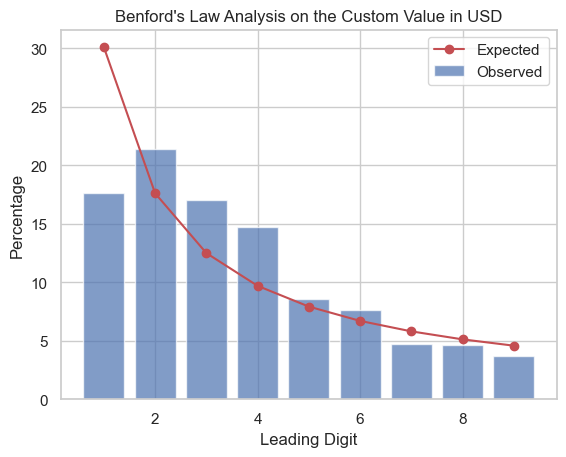

In [4867]:
data = df['custom_value_usd']
leading_digits = [int(str(abs(x))[0]) for x in data]
observed_freq = [leading_digits.count(digit) / len(leading_digits) * 100 for digit in range(1, 10)]
expected_freq = [np.log10(1 + 1/digit) * 100 for digit in range(1, 10)]
plt.bar(range(1, 10), observed_freq, label='Observed', alpha=0.7)
plt.plot(range(1, 10), expected_freq, marker='o', linestyle='-', color='r', label='Expected')
plt.xlabel('Leading Digit')
plt.ylabel('Percentage')
plt.title('Benford\'s Law Analysis on the Custom Value in USD')
plt.legend()
plt.show()


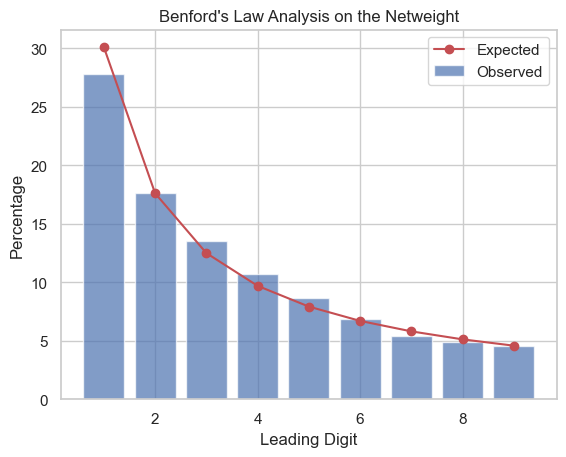

In [4868]:
data = df['netweight_kgs']
leading_digits = [int(str(abs(x))[0]) for x in data]

observed_freq = [leading_digits.count(digit) / len(leading_digits) * 100 for digit in range(1, 10)]
expected_freq = [np.log10(1 + 1/digit) * 100 for digit in range(1, 10)]
plt.bar(range(1, 10), observed_freq, label='Observed', alpha=0.7)
plt.plot(range(1, 10), expected_freq, marker='o', linestyle='-', color='r', label='Expected')
plt.xlabel('Leading Digit')
plt.ylabel('Percentage')
plt.title('Benford\'s Law Analysis on the Netweight')
plt.legend()
plt.show()


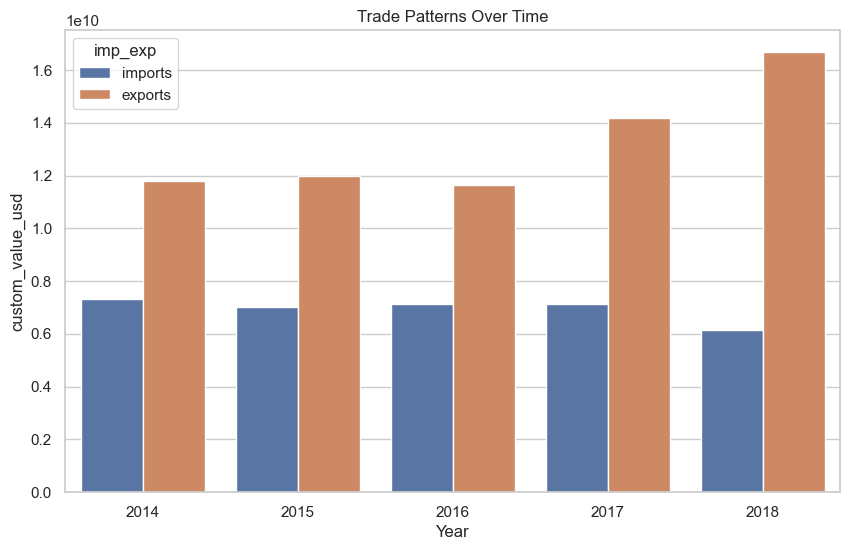

In [4869]:
# Set the style
sn.set(style="whitegrid")

# Create a bar plot to show the total imports and exports for each year
plt.figure(figsize=(10, 6))
sn.barplot(x="year", y="custom_value_usd", hue="imp_exp", data = df, errorbar = None, estimator = sum)
plt.title('Trade Patterns Over Time')
plt.xlabel('Year')
plt.ylabel('custom_value_usd')
plt.show()

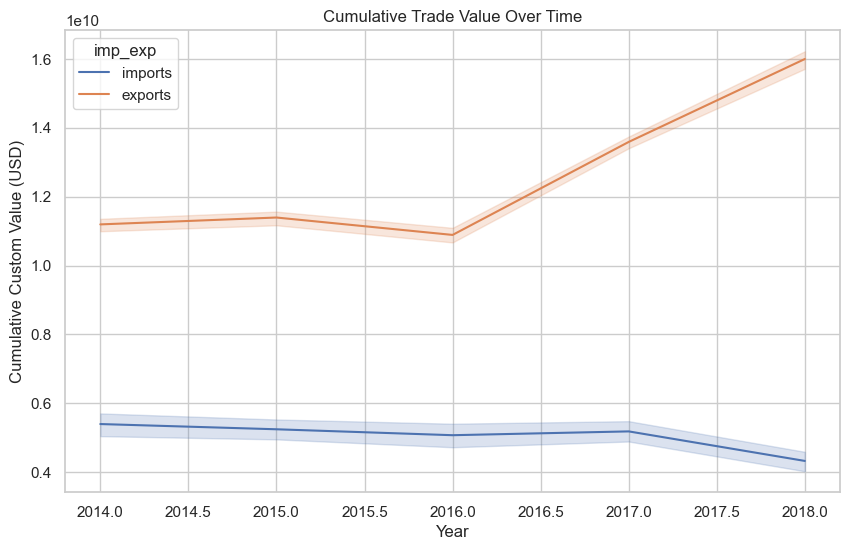

In [4870]:
# Set the style
sn.set(style="whitegrid")
df['cumulative_sum'] = df.groupby(['year', 'imp_exp'])['custom_value_usd'].cumsum()

# Create a spine chart
plt.figure(figsize=(10, 6))
sn.lineplot(x="year", y="cumulative_sum", hue="imp_exp", data=df)
plt.title('Cumulative Trade Value Over Time')
plt.xlabel('Year')
plt.ylabel('Cumulative Custom Value (USD)')
plt.show()

In [4871]:
# import_data = imports[imports['imp_exp'] == 'import']

# plt.figure(figsize=(10, 6))

# for year in import_data['year'].unique():
#     sns.kdeplot(data=df[df['year'] == year], x='custom_value_usd', label=year, fill=True, common_norm=False)

# plt.title('Distribution of Import Values Over the Years')
# plt.xlabel('custom_value_usd')
# plt.ylabel('Density')
# plt.legend(title='Year')
# plt.show()

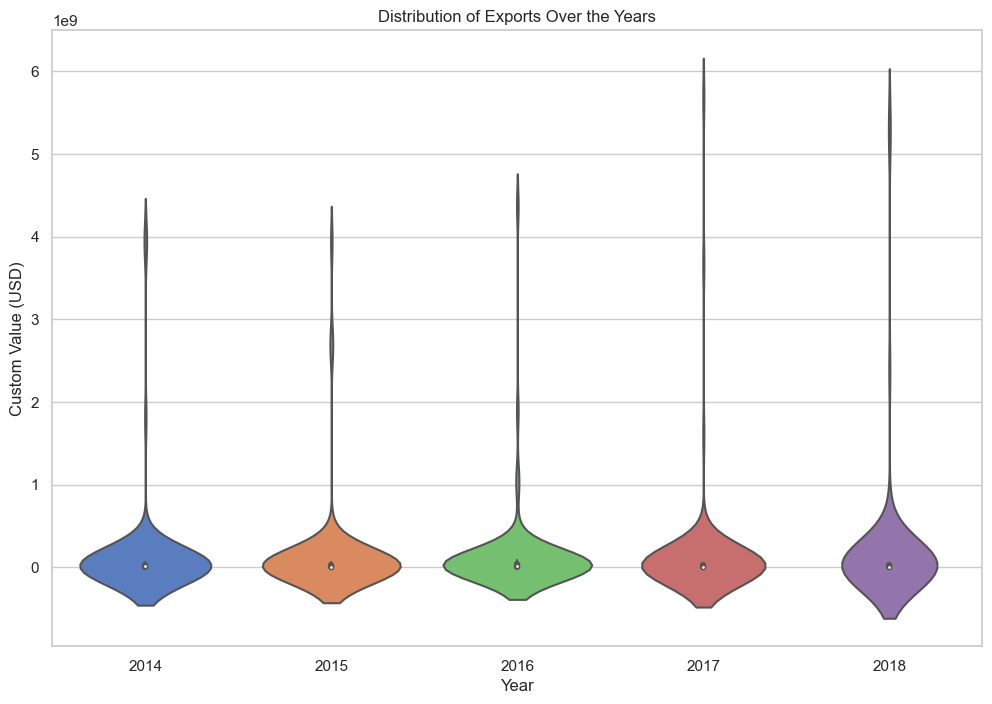

In [4872]:
# Assuming 'df' is your DataFrame
export_data = df[df['imp_exp'] == 'exports']

plt.figure(figsize=(12, 8))

# Create a violin plot
sn.violinplot(x='year', y = 'custom_value_usd', data = export_data, palette='muted')

plt.title('Distribution of Exports Over the Years')
plt.xlabel('Year')
plt.ylabel('Custom Value (USD)')
plt.show()

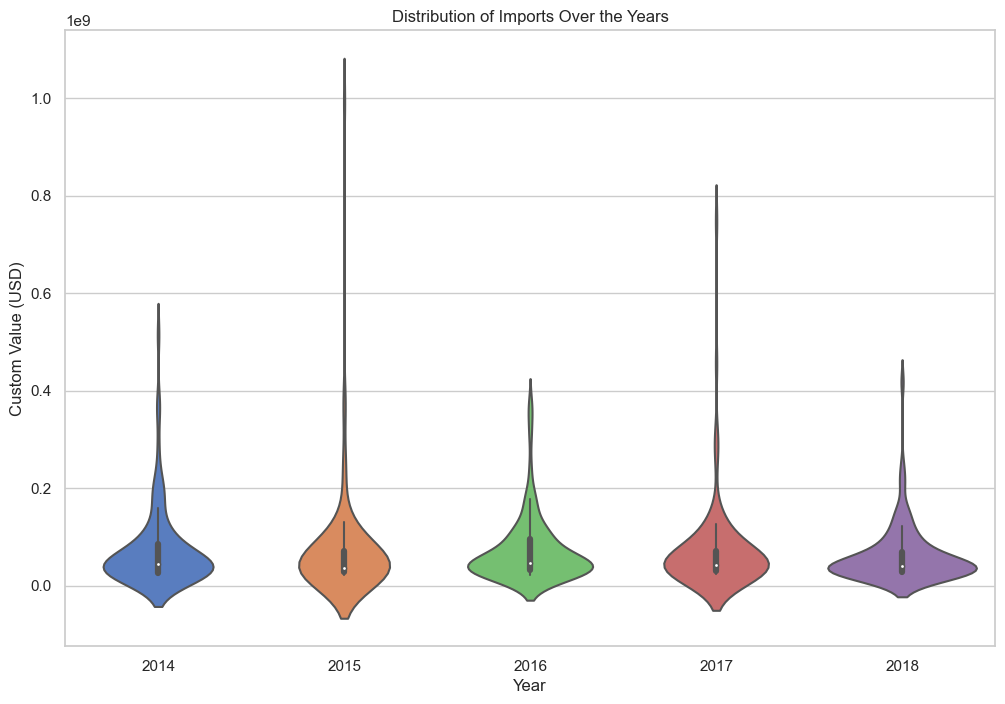

In [4873]:
# Assuming 'df' is your DataFrame
import_data = df[df['imp_exp'] == 'imports']

plt.figure(figsize=(12, 8))

# Create a violin plot
sn.violinplot(x='year', y='custom_value_usd', data=import_data, palette='muted')

plt.title('Distribution of Imports Over the Years')
plt.xlabel('Year')
plt.ylabel('Custom Value (USD)')
plt.show()

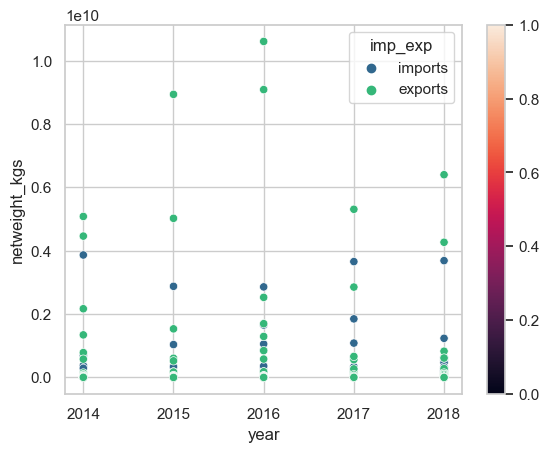

In [4874]:
data = sn.load_dataset("iris")
scatter = sn.scatterplot(x="year", y="netweight_kgs", hue="imp_exp", palette="viridis", data=df)

# Get the current Axes object from the scatter plot
ax = scatter.axes

# Add a colorbar to show luminance scale
mappable = scatter.get_children()[0]  
plt.colorbar(mappable, ax=ax)

# Show the plot
plt.show()

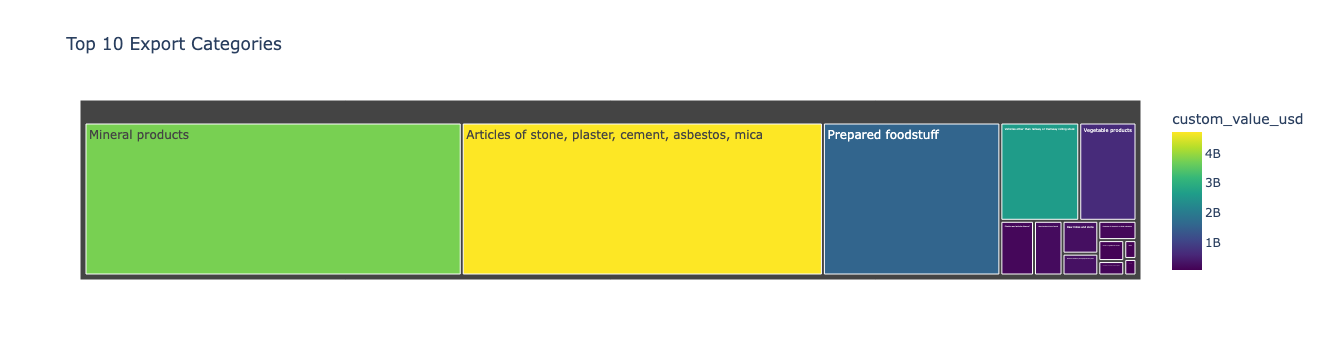

In [4875]:
top_export_categories = df[df['imp_exp'] == 'exports'].nlargest(60, 'custom_value_usd')

fig = px.treemap(top_export_categories,
                 path=['industry'], 
                 values='custom_value_usd', 
                 title='Top 10 Export Categories',
                 color='custom_value_usd',
                 color_continuous_scale='Viridis')
fig.show()


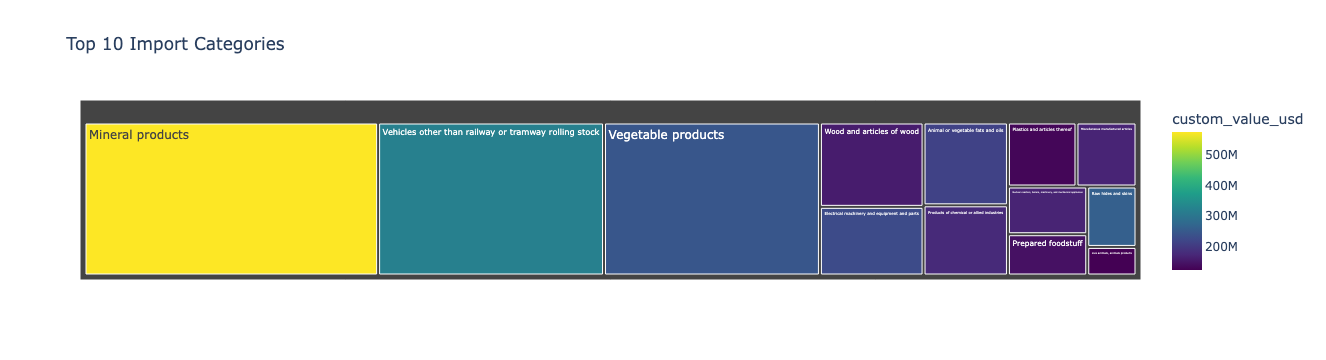

In [4876]:
top_import_categories = df[df['imp_exp'] == 'imports'].nlargest(60, 'custom_value_usd')

fig = px.treemap(top_import_categories,
                 path=['industry'], 
                 values='custom_value_usd', 
                 title='Top 10 Import Categories',
                 color='custom_value_usd',
                 color_continuous_scale='Viridis')            

fig.show()

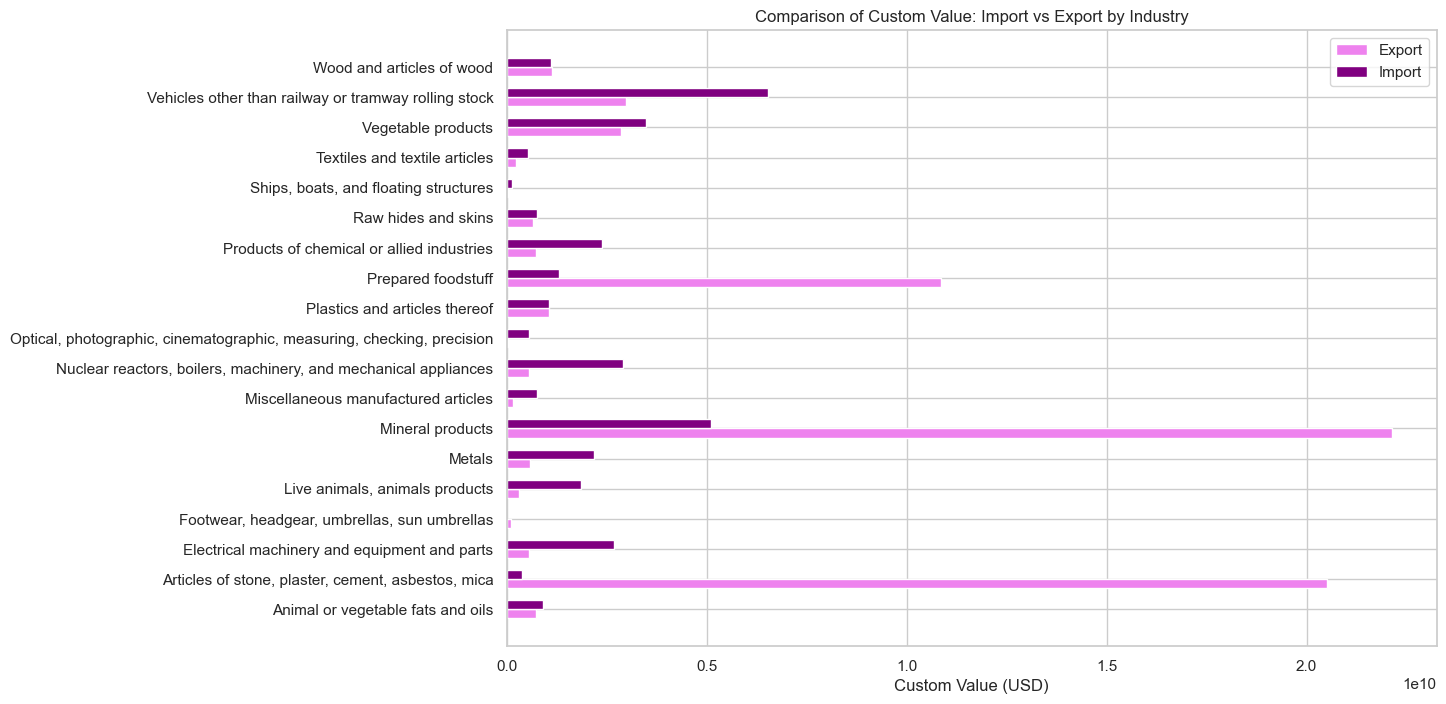

In [4877]:
import_export_data = df.groupby(['industry', 'imp_exp'])['custom_value_usd'].sum().unstack()

# Plotting a vertical double horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.3
bar_positions = np.arange(len(import_export_data))

export_bars = ax.barh(bar_positions, import_export_data['exports'], bar_width, label='Export', color='violet')
import_bars = ax.barh(bar_positions + bar_width, import_export_data['imports'], bar_width, label='Import', color='purple')

ax.set_yticks(bar_positions + bar_width / 2)
ax.set_yticklabels(import_export_data.index)

ax.set_xlabel('Custom Value (USD)')
ax.set_title('Comparison of Custom Value: Import vs Export by Industry')

ax.legend()

plt.show()


In [4878]:
# industry_totals = df.groupby(['industry', 'imp_exp', 'year'])['custom_value_usd'].sum().reset_index()

#  # Pivot the data for heatmap
# heatmap_data = industry_totals.pivot_table(index='industry', columns=['imp_exp', 'year'], values='custom_value_usd', aggfunc='sum', fill_value=0)
# plt.figure(figsize=(12, 6))
# sn.heatmap(heatmap_data, cmap='blue', annot=True, fmt=".2f", linewidths=.5)
# plt.title('Changes in Composition of Traded Industries (Custom Value)')
# plt.xlabel('Type and Year')
# plt.ylabel('Category')
# plt.show()

In [4879]:
q1 = df['custom_value_usd'].quantile(0.25)

In [4880]:
q1

9892146.781014923

In [4881]:
q3 = df['custom_value_usd'].quantile(0.75)

In [4882]:
q3

54873464.48841401

In [4883]:
iqr = q3 - q1

In [4884]:
iqr

44981317.707399085

In [4885]:
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
# filtered_df = [(df['custom_value_usd'] >= lower_bound) & (df['custom_value_usd'] <= upper_bound)]

# plt.boxplot(filtered_df['custom_value_usd'])
# plt.title('Boxplot without Outliers')
# plt.ylabel('Custom Value (USD)')
# plt.show()

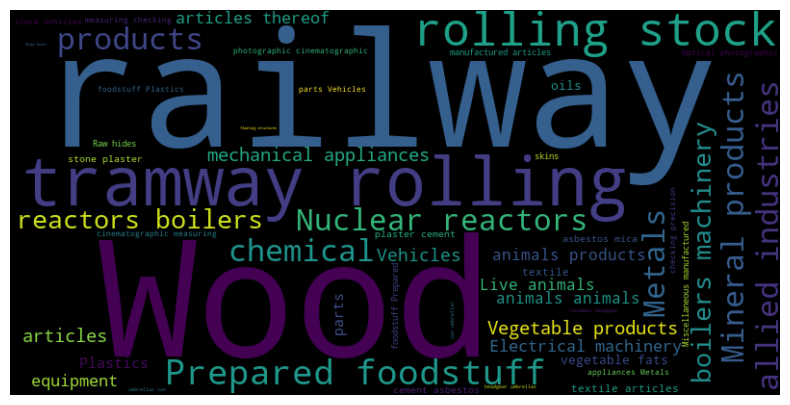

In [4887]:
industry_text = " ".join(df.apply(lambda row: row['industry'] + ' ' * int(row['custom_value_ghs']/1000000), axis=1))

wordcloud = WordCloud(width=800, height=400, background_color='black').generate(industry_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()